<a href="https://colab.research.google.com/github/RickyMacharm/Deep-Learning-with-PyTorch/blob/master/A_Pytorch_Image_Classification_Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rickyscharm","key":"ef82a138d479e46dd88f90cf1f580fda"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Mar  1 08:37 kaggle.json


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Kaggle/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *

In [0]:

folder = 'images'

path = Path(base_dir + 'data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
import os
os.chdir('/content/gdrive/My Drive/Kaggle/data/images/train')

In [6]:
# Lets check and see the files that ready for us to use
!ls

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [0]:
# List available datasets.
!kaggle competitions list 

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2523           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10204            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4180           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         35           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2427           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2927           False  
LANL-Ear

In [0]:
# copy and paste the data url from kaggle here
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 11.9MB/s]
 97% 263M/271M [00:05<00:00, 50.9MB/s]
100% 271M/271M [00:05<00:00, 49.0MB/s]
 97% 529M/543M [00:13<00:00, 36.9MB/s]
100% 543M/543M [00:13<00:00, 42.8MB/s]


In [0]:
#unzip all files
!unzip \*.zip

Archive:  test1.zip
   creating: test1/
  inflating: test1/1.jpg             
  inflating: test1/10.jpg            
  inflating: test1/100.jpg           
  inflating: test1/1000.jpg          
  inflating: test1/10000.jpg         
  inflating: test1/10001.jpg         
  inflating: test1/10002.jpg         
  inflating: test1/10003.jpg         
  inflating: test1/10004.jpg         
  inflating: test1/10005.jpg         
  inflating: test1/10006.jpg         
  inflating: test1/10007.jpg         
  inflating: test1/10008.jpg         
  inflating: test1/10009.jpg         
  inflating: test1/1001.jpg          
  inflating: test1/10010.jpg         
  inflating: test1/10011.jpg         
  inflating: test1/10012.jpg         
  inflating: test1/10013.jpg         
  inflating: test1/10014.jpg         
  inflating: test1/10015.jpg         
  inflating: test1/10016.jpg         
  inflating: test1/10017.jpg         
  inflating: test1/10018.jpg         
  inflating: test1/10019.jpg         
  inflatin

## Introducing FastAI


In [0]:
path_img = '/content/gdrive/My Drive/Kaggle/data/images/train'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/gdrive/My Drive/Kaggle/data/images/train/cat.9104.jpg'),
 PosixPath('/content/gdrive/My Drive/Kaggle/data/images/train/cat.9069.jpg'),
 PosixPath('/content/gdrive/My Drive/Kaggle/data/images/train/cat.9081.jpg'),
 PosixPath('/content/gdrive/My Drive/Kaggle/data/images/train/cat.9083.jpg'),
 PosixPath('/content/gdrive/My Drive/Kaggle/data/images/train/cat.9096.jpg')]

In [0]:
import numpy as np

np.random.seed(2)
pat = r'/([^/]+).\d+.jpg$'

In [16]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)


ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat.91,cat.90,cat.90,cat.90,cat.90
Path: /content/gdrive/My Drive/Kaggle/data/images/train;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog.68,cat.13,cat.95,cat.103,dog.6
Path: /content/gdrive/My Drive/Kaggle/data/images/train;

Test: None

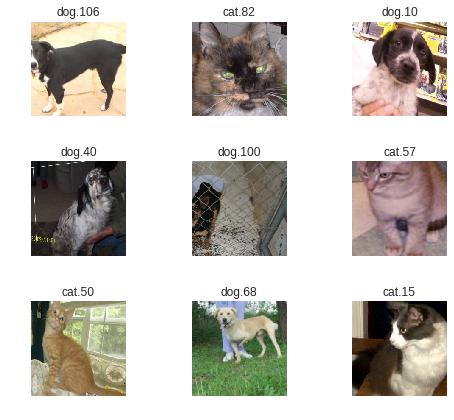

In [17]:
data.show_batch(rows=3, figsize=(7,6))

In [18]:
print(data.classes)
len(data.classes),data.c

['cat', 'cat.', 'cat.1', 'cat.10', 'cat.100', 'cat.101', 'cat.102', 'cat.103', 'cat.104', 'cat.105', 'cat.106', 'cat.107', 'cat.108', 'cat.109', 'cat.11', 'cat.110', 'cat.111', 'cat.112', 'cat.113', 'cat.114', 'cat.115', 'cat.116', 'cat.117', 'cat.118', 'cat.119', 'cat.12', 'cat.120', 'cat.121', 'cat.122', 'cat.123', 'cat.124', 'cat.13', 'cat.14', 'cat.15', 'cat.16', 'cat.17', 'cat.18', 'cat.19', 'cat.2', 'cat.20', 'cat.21', 'cat.22', 'cat.23', 'cat.24', 'cat.25', 'cat.26', 'cat.27', 'cat.28', 'cat.29', 'cat.3', 'cat.30', 'cat.31', 'cat.32', 'cat.33', 'cat.34', 'cat.35', 'cat.36', 'cat.37', 'cat.38', 'cat.39', 'cat.4', 'cat.40', 'cat.41', 'cat.42', 'cat.43', 'cat.44', 'cat.45', 'cat.46', 'cat.47', 'cat.48', 'cat.49', 'cat.5', 'cat.50', 'cat.51', 'cat.52', 'cat.53', 'cat.54', 'cat.55', 'cat.56', 'cat.57', 'cat.58', 'cat.59', 'cat.6', 'cat.60', 'cat.61', 'cat.62', 'cat.63', 'cat.64', 'cat.65', 'cat.66', 'cat.67', 'cat.68', 'cat.69', 'cat.7', 'cat.70', 'cat.71', 'cat.72', 'cat.73', 'cat.7

(252, 252)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [21]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [22]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: ignored